# DocVQA/InfoVQA document proportions
#### Experiment: Effect of the document/infographic aspect ratio on the model performance

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import math
import numpy as np
from PIL import Image
import seaborn as sns
from matplotlib import pyplot
from datasets import load_from_disk

/home/jmorales/anaconda3/envs/tfg/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
# Get the width and height of all the documents in DocVQA
width_list, height_list, ratio_list = [], [], []
for split in ["train", "test", "val"]:
    folder = os.listdir(f"../data/docvqa/{split}/documents")
    for image_file in folder:
        image = Image.open(f"../data/docvqa/{split}/documents/{image_file}")
        width_list.append(image.width)
        height_list.append(image.height)
        ratio_list.append(image.width/image.height)

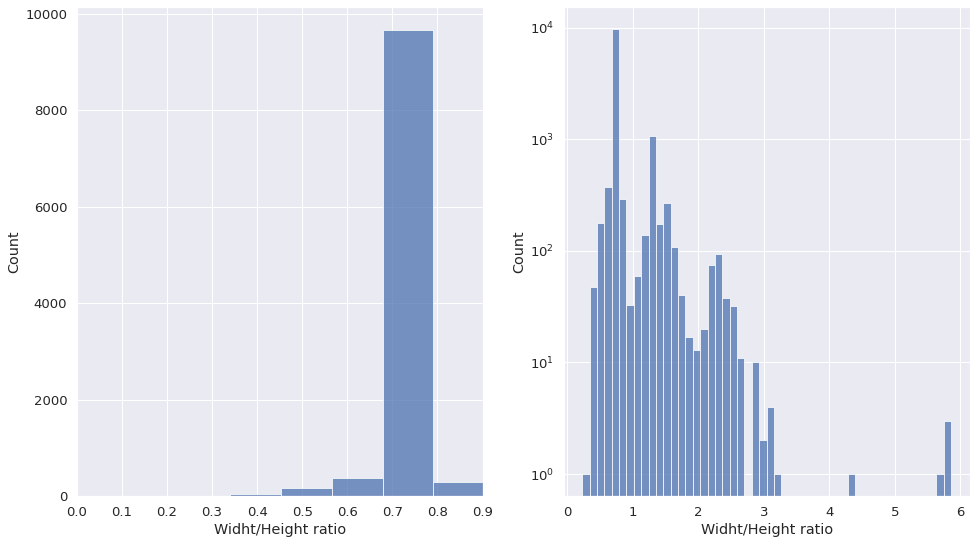

In [39]:
sns.set(font_scale=1.2)

fig, ax = pyplot.subplots(1, 2, figsize=(16, 9))
sns.histplot(ratio_list, ax=ax[0], bins=50)
ax[0].set(xlabel="Widht/Height ratio", xlim = (0, 0.9));
sns.histplot(ratio_list, ax=ax[1], bins=50)
ax[1].set(yscale="log", xlabel="Widht/Height ratio");

In [4]:
var = np.var(ratio_list)
mean = np.mean(ratio_list)
median = np.median(ratio_list)
std = np.std(ratio_list)
n = len(ratio_list)

# Not ideal since the ratio distribution clearly is not normally distributed
ci1 = (mean - 1.96*std/np.sqrt(n),
       mean + 1.96*std/np.sqrt(n))

# This interval seems to include most of the standard sized documents (dinA4-ish) 
ci2 = (median - var, median + var)

sum(np.logical_and(ratio_list >= ci1[0], ratio_list <= ci1[1]))
sum(np.logical_and(ratio_list >= ci2[0], ratio_list <= ci2[1]))

ci2

(0.6636871690622075, 0.885544989926049)

In [5]:
# Resulting InfographicVQA subdataset for document-sized infographics
dataset1 = load_from_disk(
    "../cached_datasets/infographicvqa_document_ratio_experiment_msr_ocr_True_extraction_v1_enumeration")

# InfographicVQA dataset
dataset2 = load_from_disk(
    "../cached_datasets/infographicvqa_all_lowercase_True_msr_ocr_True_extraction_v1_enumeration")

In [6]:
dataset1["train"], dataset1["val"], dataset1["test"]

(Dataset({
     features: ['questionId', 'question', 'image_local_name', 'image_url', 'ocr_output_file', 'original_answer', 'data_split', 'image', 'ocr_text', 'words', 'layout', 'processed_answers'],
     num_rows: 4225
 }),
 Dataset({
     features: ['questionId', 'question', 'image_local_name', 'image_url', 'ocr_output_file', 'original_answer', 'data_split', 'image', 'ocr_text', 'words', 'layout', 'processed_answers'],
     num_rows: 366
 }),
 Dataset({
     features: ['questionId', 'question', 'image_local_name', 'image_url', 'ocr_output_file', 'data_split', 'original_answer', 'image', 'ocr_text', 'words', 'layout', 'processed_answers'],
     num_rows: 512
 }))

In [7]:
dataset2["train"], dataset2["val"], dataset2["test"]

(Dataset({
     features: ['questionId', 'question', 'image_local_name', 'image_url', 'ocr_output_file', 'original_answer', 'data_split', 'image', 'ocr_text', 'words', 'layout', 'processed_answers'],
     num_rows: 23946
 }),
 Dataset({
     features: ['questionId', 'question', 'image_local_name', 'image_url', 'ocr_output_file', 'original_answer', 'data_split', 'image', 'ocr_text', 'words', 'layout', 'processed_answers'],
     num_rows: 2801
 }),
 Dataset({
     features: ['questionId', 'question', 'image_local_name', 'image_url', 'ocr_output_file', 'data_split', 'original_answer', 'image', 'ocr_text', 'words', 'layout', 'processed_answers'],
     num_rows: 3288
 }))

In [29]:
# Get the width and height of all the documents in DocVQA

width_list, height_list, ratio_list = [], [], []
for split in ["train", "test", "val"]:
    folder = os.listdir(f"../data/infographicvqa/{split}/infographicVQA_{split}_v1.0_images")
    for image_file in folder:
        image = Image.open(f"../data/infographicvqa/{split}/infographicVQA_{split}_v1.0_images/{image_file}")
        width_list.append(image.width)
        height_list.append(image.height)
        ratio_list.append(image.width/image.height)

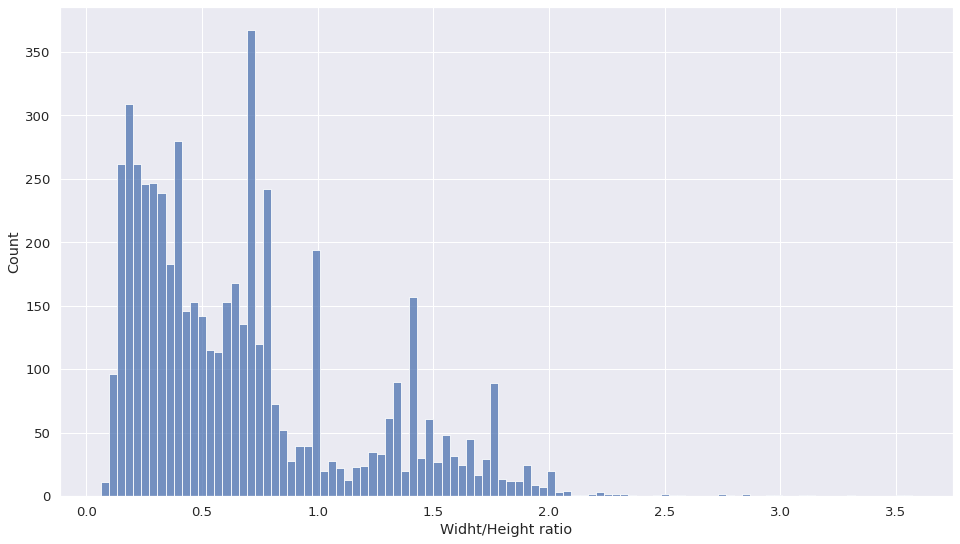

In [30]:
sns.set(font_scale=1.2)

fig, ax = pyplot.subplots(1, 1, figsize=(16, 9))
sns.histplot(ratio_list, ax=ax, bins=100)
ax.set(yscale="linear", xlabel="Widht/Height ratio");

In [13]:
np.quantile(ratio_list, 0.25)

0.2976190476190476

In [19]:
np.quantile(ratio_list, 0.75)

0.8626198083067093

In [16]:
np.quantile(ratio_list, 0.5)

0.5681818181818182